In [1]:
import importlib
import numpy as np
from fastapi import APIRouter, Depends, HTTPException
import glob
import pathlib
import zarr
import os
from pydantic import BaseModel
from typing import List, Optional
import matplotlib.pyplot as plt
# import napari

# Import db
from app import db_models
from app.database import SessionLocal, engine
import app.crud as crud

# Import classes
from app.api import classes_internal as c_int
from app.api import classes_db as c_db
from app.api import classes_com as c_com
from app.api import utils_import
from app.api import utils_paths
from app.tests import utils_tests
from app.api import napari_viewer
from app.api import utils_segmentation_random_forest as utils_seg_rf

Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.


In [5]:
# has to be included at top of main.py
# db_models.Base.metadata.create_all(bind=engine)

In [7]:
# import test images
# utils_tests.import_test_images()

In [8]:
importlib.reload(utils_tests)
importlib.reload(utils_paths)
importlib.reload(c_int)
importlib.reload(c_db)
importlib.reload(c_com)
importlib.reload(crud)
importlib.reload(napari_viewer)

Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.


<module 'app.api.napari_viewer' from 'D:\\Programming\\github\\mistos\\prototyping\\backend\\src\\app\\api\\napari_viewer.py'>

In [6]:
from app.api import utils_segmentation_random_forest as utils_segmentation_rf

In [9]:
# Load image
uid = 9
img = crud.read_image_by_uid(uid)

clf_uid = 3
int_clf = crud.read_classifier_by_uid(clf_uid)

threshold = 0.7
multichannel = int_clf.is_multichannel()

In [3]:
img_array = img.data[0, 0, ...]
img_array.shape

(2044, 1309)

In [10]:
napari_viewer.view(img, display_bg_layer = False, display_segmentation_layers = True)
# (2637955, 24)

In [3]:
segmentation_layer_uid = 6

In [7]:
measurement_result = img.measure_mask_in_image(segmentation_layer_uid)

NameError: name 'segmentation_layer_uid' is not defined

In [6]:
import app.api.utils_paths as utils_paths
utils_paths.make_measurement_path(3)

In [32]:
len(measurement_result.measurement)

32

In [3]:
# Create Experiment
new_experiment = c_int.IntExperiment(
    uid = -1,
    name = "Test Experiment",
    hint = "Hinty Hint",
)
new_experiment.on_init()

On Init IntExperiment:
New Experiment created with id 17


In [4]:
new_experiment.add_experiment_group("test group 1")

On Init IntExperimentGroup:
New Group created with id 17


In [5]:
new_experiment.experiment_groups[0].add_image_by_uid(uid)

In [6]:
new_exp_group = new_experiment.experiment_groups[0]

In [16]:
new_exp_group.add_image_by_uid(uid)

In [15]:
new_exp_group.add_result_layer(1)

In [9]:
new_exp_group.add_measurement(1)

In [10]:
new_exp_group.dict()["measurement_ids"]
# new_exp_group.dict()["result_layer_ids"]
# new_exp_group.dict()["images"]

[1]

In [11]:
new_exp_group.remove_result_layer(1)

In [12]:
new_exp_group.remove_image(uid)

In [13]:
new_exp_group.remove_measurement(1)

In [20]:
img = new_exp_group.images[0]
result_layer = img.select_result_layer(6)
result_layer_array = result_layer.data

In [24]:
result_layer_array.shape

(2046, 1309)

In [30]:
result_layer_array[result_layer_array>0] = 1

In [34]:
result_layer_array = result_layer_array.astype(bool)

In [35]:
np.unique(result_layer_array)

array([False,  True])

In [43]:
cl_img_array = morphology.area_closing(
    result_layer_array, 
    200,
)

rm_so_img_array = morphology.remove_small_objects(
    cl_img_array,
    min_size = 64,
    connectivity = 4
)

rm_so_fh_img_array = morphology.remove_small_holes(
    rm_so_img_array,
    900,
    4
)

In [39]:
np.unique(rm_so_img_array)

array([False,  True])

In [21]:

import skimage.morphology as morphology

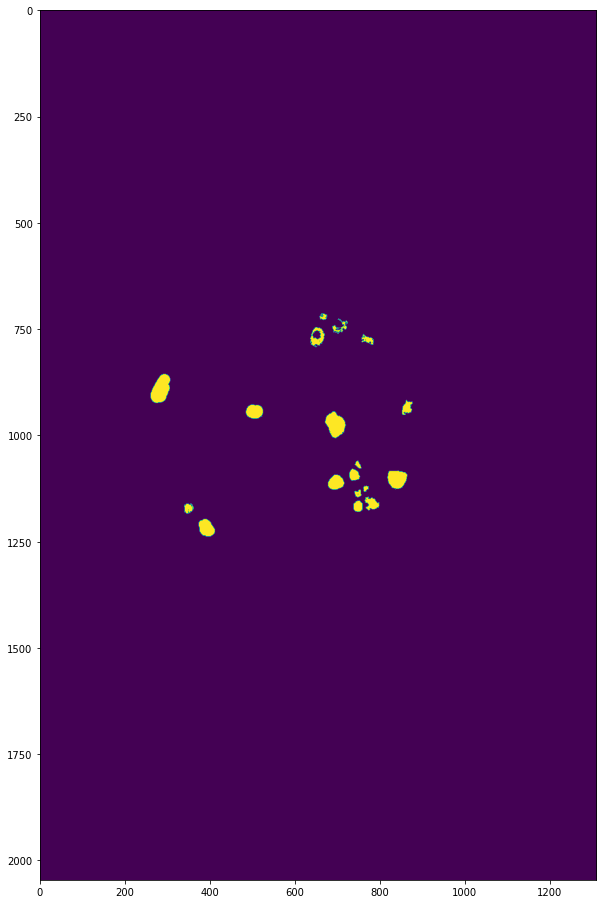

In [44]:
plt.figure(figsize = (16,16))
plt.imshow(rm_so_img_array)

In [22]:
with SessionLocal(expire_on_commit = False) as sess:
    sql_image = sess.query(db_models.Image).filter(db_models.Image.id == uid).one()
    print([_.id for _ in sql_image.experiment_groups])

[1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]


In [20]:
sql_image.experiment_groups

DetachedInstanceError: Parent instance <Image at 0x1a24196f2e0> is not bound to a Session; lazy load operation of attribute 'experiment_groups' cannot proceed (Background on this error at: http://sqlalche.me/e/14/bhk3)

In [9]:
# add result layer to experiment group

In [10]:
# add measurement to ex

In [11]:
# create experiment

In [12]:
# create experiment groups

In [13]:
# Remove Experiment groups

In [25]:
# Add Images to groups

In [26]:
# Remove Images from groups

In [27]:
# Make measurements

In [28]:
# remove measurements

In [29]:
# create result

In [ ]:
# Remove result